<a href="https://colab.research.google.com/github/jinay780/python/blob/master/Insurance_Claim_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [3]:
data.shape

(348, 7)

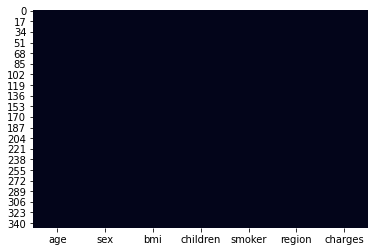

In [4]:
sns.heatmap(data.isnull(),cbar=False)

In [5]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


In [6]:
data['sex'].value_counts()

1    177
0    171
Name: sex, dtype: int64

In [7]:
data['age'].value_counts()

19    22
18    17
28    11
40    11
29    10
34    10
63    10
46    10
53     9
22     9
52     9
41     9
54     9
59     9
55     9
60     9
56     8
58     8
30     8
37     8
44     8
27     8
26     7
31     7
32     7
20     7
50     7
24     6
45     6
61     6
48     6
25     6
35     5
36     5
38     5
47     5
49     5
64     5
51     4
57     4
42     4
23     4
21     4
62     4
33     3
43     3
39     2
Name: age, dtype: int64

In [8]:
data['smoker'].value_counts()

0    267
1     81
Name: smoker, dtype: int64

Text(0.5, 1.0, 'Age vs Charges')

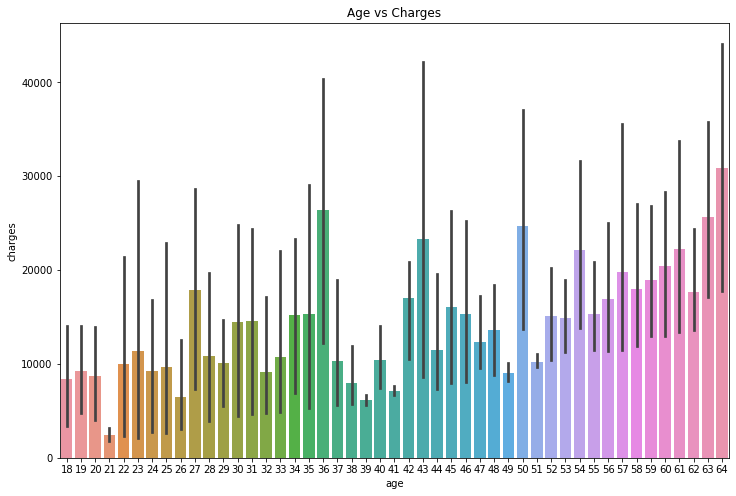

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
sns.barplot(x = 'age', y = 'charges', data = data)

plt.title("Age vs Charges")

Text(0.5, 1.0, 'sex vs charges')

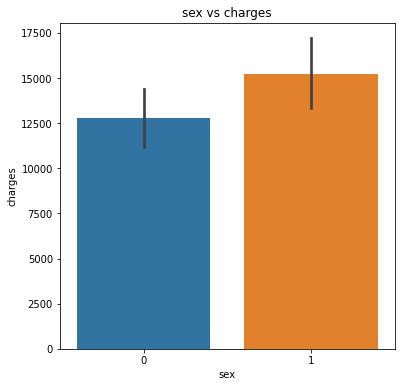

In [10]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'sex', y = 'charges', data = data)

plt.title('sex vs charges')

Text(0.5, 1.0, 'children vs charges')

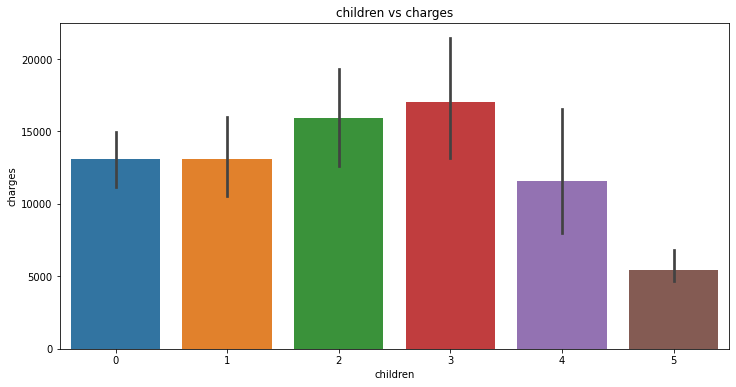

In [11]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'children', y = 'charges', data = data)

plt.title('children vs charges')

Text(0.5, 1.0, 'region vs charges')

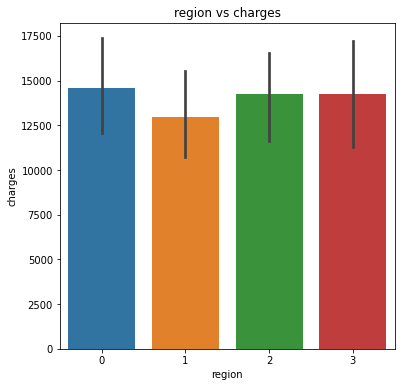

In [12]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'region', y = 'charges', data = data)

plt.title('region vs charges')

Text(0.5, 1.0, 'smoker vs charges')

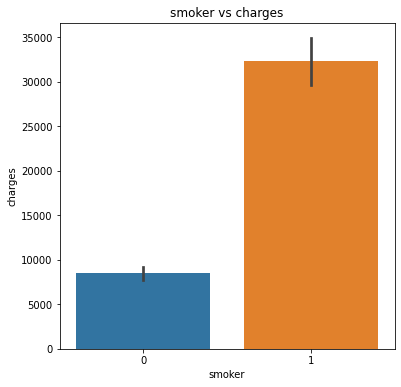

In [13]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'smoker', y = 'charges', data = data)

plt.title('smoker vs charges')

In [14]:
X=data.iloc[:,:5]
y=data.iloc[:,5]

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)



MSE : 1.3106911773636771
RMSE : 1.14485421664231


In [17]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 1.2317700620465895
RMSE : 1.109851369349333
r2 score : -0.039021054231070496


In [18]:
from sklearn.svm import SVR

model = SVR()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 1.3054477646659735
RMSE : 1.142561930341622
r2 score : -0.10116957253628311
